# Análise Exploratória de Dados e Criação de Modelos de Previsão de Preços
Esse trabalho consiste em criar um modelo de previsão de preços de aluguéis na cidade de Nova York com base em um dataset contendo informações sobre anúncios de aluguéis.

## Importações

Importação das bibliotecas. Caso não tenha alguma dessas instaladas, instale-as com "pip install nome_da_biblioteca".

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from folium.plugins import HeatMap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Deixar dados em duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df =pd.read_csv("teste_indicium_precificacao_dados.csv")

## Sumário

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva


## Análise Exploratória

In [8]:
#Verificar as primeiras linhas do modelo
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [9]:
#Verificar as dimensões do arquivo linhas/colunas
df.shape

(48894, 16)

In [10]:
#Verificar os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
#Verificação se há dados nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [12]:
#Verificação de valores únicos de cada variável
single_valors = []
for i in df.columns[0:16].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    single_valors.append(len(df[i].astype(str).value_counts()))

id : 48894
nome : 47905
host_id : 37457
host_name : 11453
bairro_group : 5
bairro : 221
latitude : 19048
longitude : 14718
room_type : 3
price : 674
minimo_noites : 109
numero_de_reviews : 394
ultima_review : 1765
reviews_por_mes : 938
calculado_host_listings_count : 47
disponibilidade_365 : 366


In [13]:
#Verificação das medidas estatísticas básicas no dataframe como média, desvio, mínimo, máximo e quartis
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,38842.00,48894.00,48894.00
mean,19017532.13,67621393.58,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10982884.05,78611176.15,0.05,0.05,240.16,20.51,44.55,1.68,32.95,131.62
min,2595.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9472370.75,7822736.75,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677431.50,30795529.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152249.25,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


### Pré processamento dos dados

In [15]:
# Colocando a média nos valores continuos vazios
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(df['reviews_por_mes'].mean())

### Avaliação de algumas variáveis através de dados e gráficos para melhor compreensão
#### Variável: "ID"

In [17]:
#Verificação se todos os IDs são únicos
id_unico = df["id"].is_unique
if (id_unico == True) :
    print("Os IDs são únicos? Sim, todos são únicos")
else :
    print("Os IDs são únicos? Não, todos não são únicos")


Os IDs são únicos? Sim, todos são únicos


#### Variável: "Host_id"

In [19]:
#Formação de gráfico para mostrar faixas categorizadas de quantidade de anuncios por host
anuncios_por_host = df["host_id"].value_counts()
bins = [1, 2, 3, 4, 5, anuncios_por_host.max()]
labels = ["1 anúncio", "2 anúncios","3 anúncios","4 anúncios", "5+ anúncios"]
faixas = pd.cut(anuncios_por_host, bins=bins, labels=labels, right=False)
distribuicao = faixas.value_counts().sort_index()

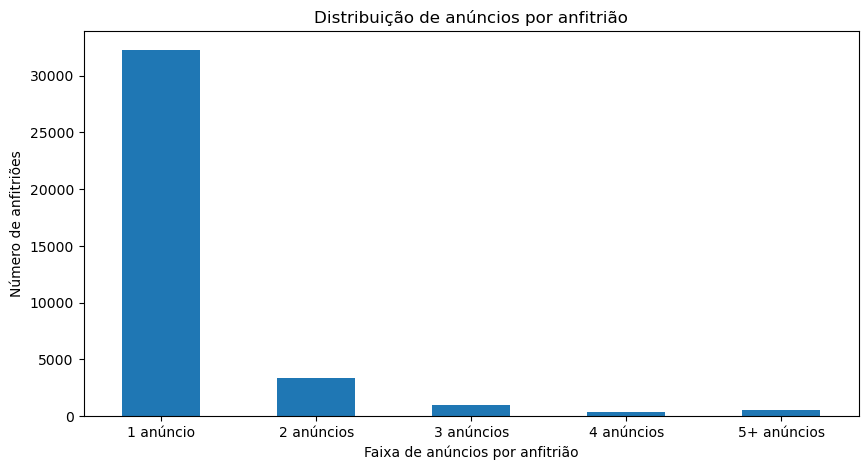

In [20]:
plt.figure(figsize=(10, 5))
distribuicao.plot(kind="bar")
plt.xlabel("Faixa de anúncios por anfitrião")
plt.ylabel("Número de anfitriões")
plt.title("Distribuição de anúncios por anfitrião")
plt.xticks(rotation=0)
plt.show()

##### Comentário:
Grande parte dos anunciantes só possuem um anúncio no banco de dados

#### Variáveis: "bairro_group" e "bairro"

In [23]:
#Contagem de bairros por grupo
bairros_por_grupo = df.groupby("bairro_group")["bairro"].nunique()
bairros_por_grupo

bairro_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: bairro, dtype: int64

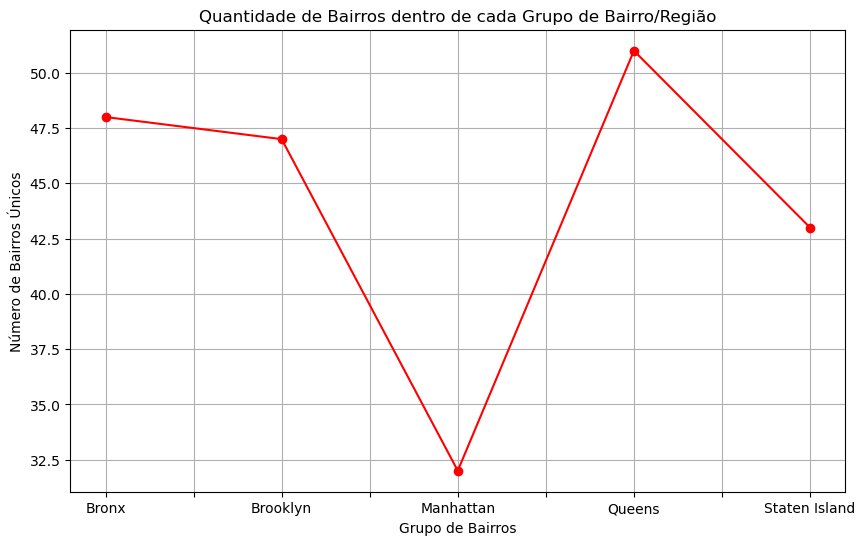

In [24]:
#Dados em forma de gráfico
plt.figure(figsize=(10, 6))
bairros_por_grupo.plot(kind="line", marker="o",linestyle="-", color="red")

plt.xlabel("Grupo de Bairros")
plt.ylabel("Número de Bairros Únicos")
plt.title("Quantidade de Bairros dentro de cada Grupo de Bairro/Região")
plt.xticks(rotation=0)  
plt.grid(True)
plt.show()

##### Comentário:
Manhattan é a região com menos bairros

#### Variáveis: "Latitude" e "Longitude"

In [27]:
#Verificação real de onde estão sendo feito os anúncios
mapaDeCalor = folium.Map(
    #Localização da cidade de Nova York segundo lat e long do google
    location=[40.6643, -73.9385], 
    #Nível de zoom adequado para uma cidade
    zoom_start=11,
    #Tipo de mapa
    tiles= "OpenStreetMap"
)
#Personalização da escala de calor
HeatMap(
    #Localização dos dados do banco
    data=df[['latitude', 'longitude']].values,
    #raio da localização
    radius=15,
    blur=17, 
    max_zoom=1
).add_to(mapaDeCalor)
mapaDeCalor

##### Comentário:
Apesar dos alúgueis estarem localizados na cidade de Nova York, parte dos seus anúncios se encontram nas cidades vizinhas.

#### Variáveis: "room_type" e "disponibilidade_365"

In [30]:
#Verificar a média de disponibilidade anual por tipo de quarto
disponibilidade_quarto = df.groupby("room_type")["disponibilidade_365"].mean()

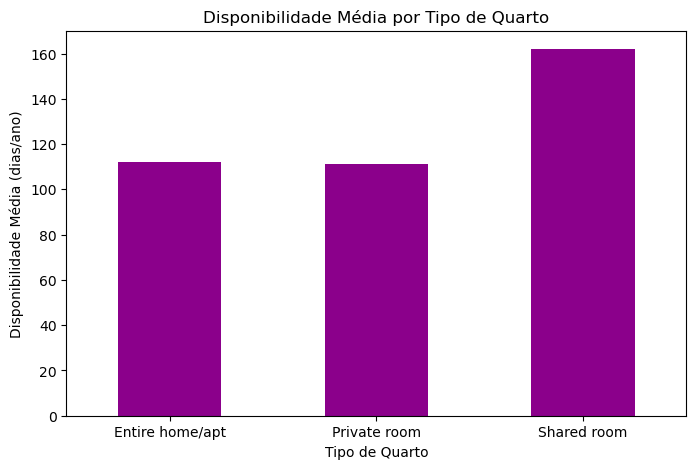

In [31]:
plt.figure(figsize=(8, 5))
disponibilidade_quarto.plot(kind="bar", color="#8B008B")

plt.xlabel("Tipo de Quarto")
plt.ylabel("Disponibilidade Média (dias/ano)")
plt.title("Disponibilidade Média por Tipo de Quarto")
plt.xticks(rotation=0)
plt.show()

#### Variáveis: "price" e "group_bairro"

In [33]:
#Criação de gráfico para mostrar o cálculo do preço médio por região
PrecoMedGrBairros = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
PrecoMedGrBairros

bairro_group
Manhattan       196.88
Brooklyn        124.38
Staten Island   114.81
Queens           99.52
Bronx            87.50
Name: price, dtype: float64

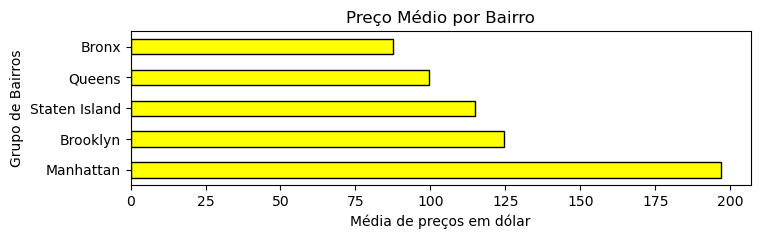

In [34]:
PrecoMedGrBairros.plot(kind='barh',figsize=(8,2), color = "yellow", edgecolor = "black")
plt.title("Preço Médio por Bairro")
plt.ylabel("Grupo de Bairros")
plt.xlabel("Média de preços em dólar")
plt.show()

##### Comentário:
Manhattan tende a ter preços mais altos que em outras regiões

#### Variáveis: "reviews_por_mes" e "group_bairro"

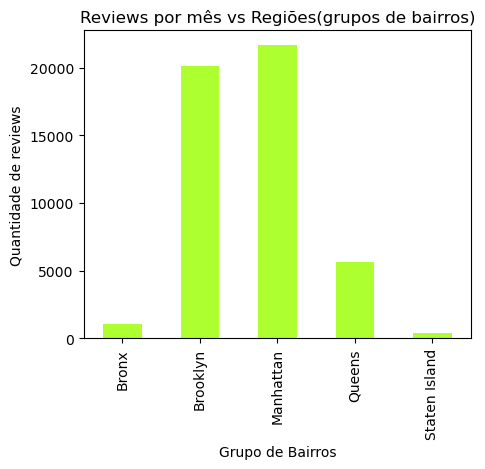

In [37]:
#Verificação por meio de um gráfico que mostra a contagem de reviews pertencentes aos aluguéis de cada bairro
df.groupby('bairro_group')['reviews_por_mes'].count().plot(kind='bar', figsize=(5,4), color = "#ADFF2F")
plt.title("Reviews por mês vs Regiões(grupos de bairros)")
plt.xlabel("Grupo de Bairros")
plt.ylabel("Quantidade de reviews")
plt.show()

#### Variáveis: "room_type" e "price"

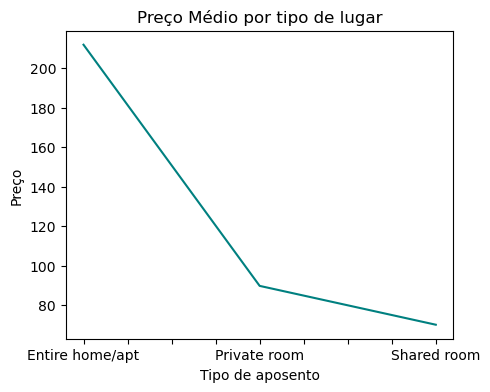

In [39]:
#Gráfico para mostrar a média de preços por tipo de quarto
df.groupby('room_type')['price'].mean().plot(kind='line', figsize=(5,4), color = "#008080")
plt.title("Preço Médio por tipo de lugar")
plt.xlabel("Tipo de aposento")
plt.ylabel("Preço")
plt.show()

##### Comentário:
Aluguéis de casas e apartamentos tendem a ser mais caros que apenas aposentos de quartos particulares e compartilhados

### Análise das Variáveis Numéricas e seus Possíveis Outliers

In [42]:
#Separar variáveis numéricas relevantes para criação de gráficos em boxplot

Var_Num_relevantes = ["price", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365"]

##### Justificativas:
price (Preço por noite) → Pode haver valores muito altos ou muito baixos.

minimo_noites (Mínimo de noites) → Anúncios exigindo estadias mínimas muito longas podem ser outliers.

numero_de_reviews (Número de avaliações) → Anúncios com avaliações extremamente altas ou zero podem ser considerados outliers.

reviews_por_mes (Número de avaliações mensais) → Pode indicar se um anúncio recebe avaliações em uma frequência anormal.

calculado_host_listings_count (Número de anúncios por anfitrião) → Anfitriões com muitos anúncios podem ser outliers.

disponibilidade_365 (Disponibilidade no ano) → Anúncios disponíveis 365 dias podem ser diferentes da maioria.

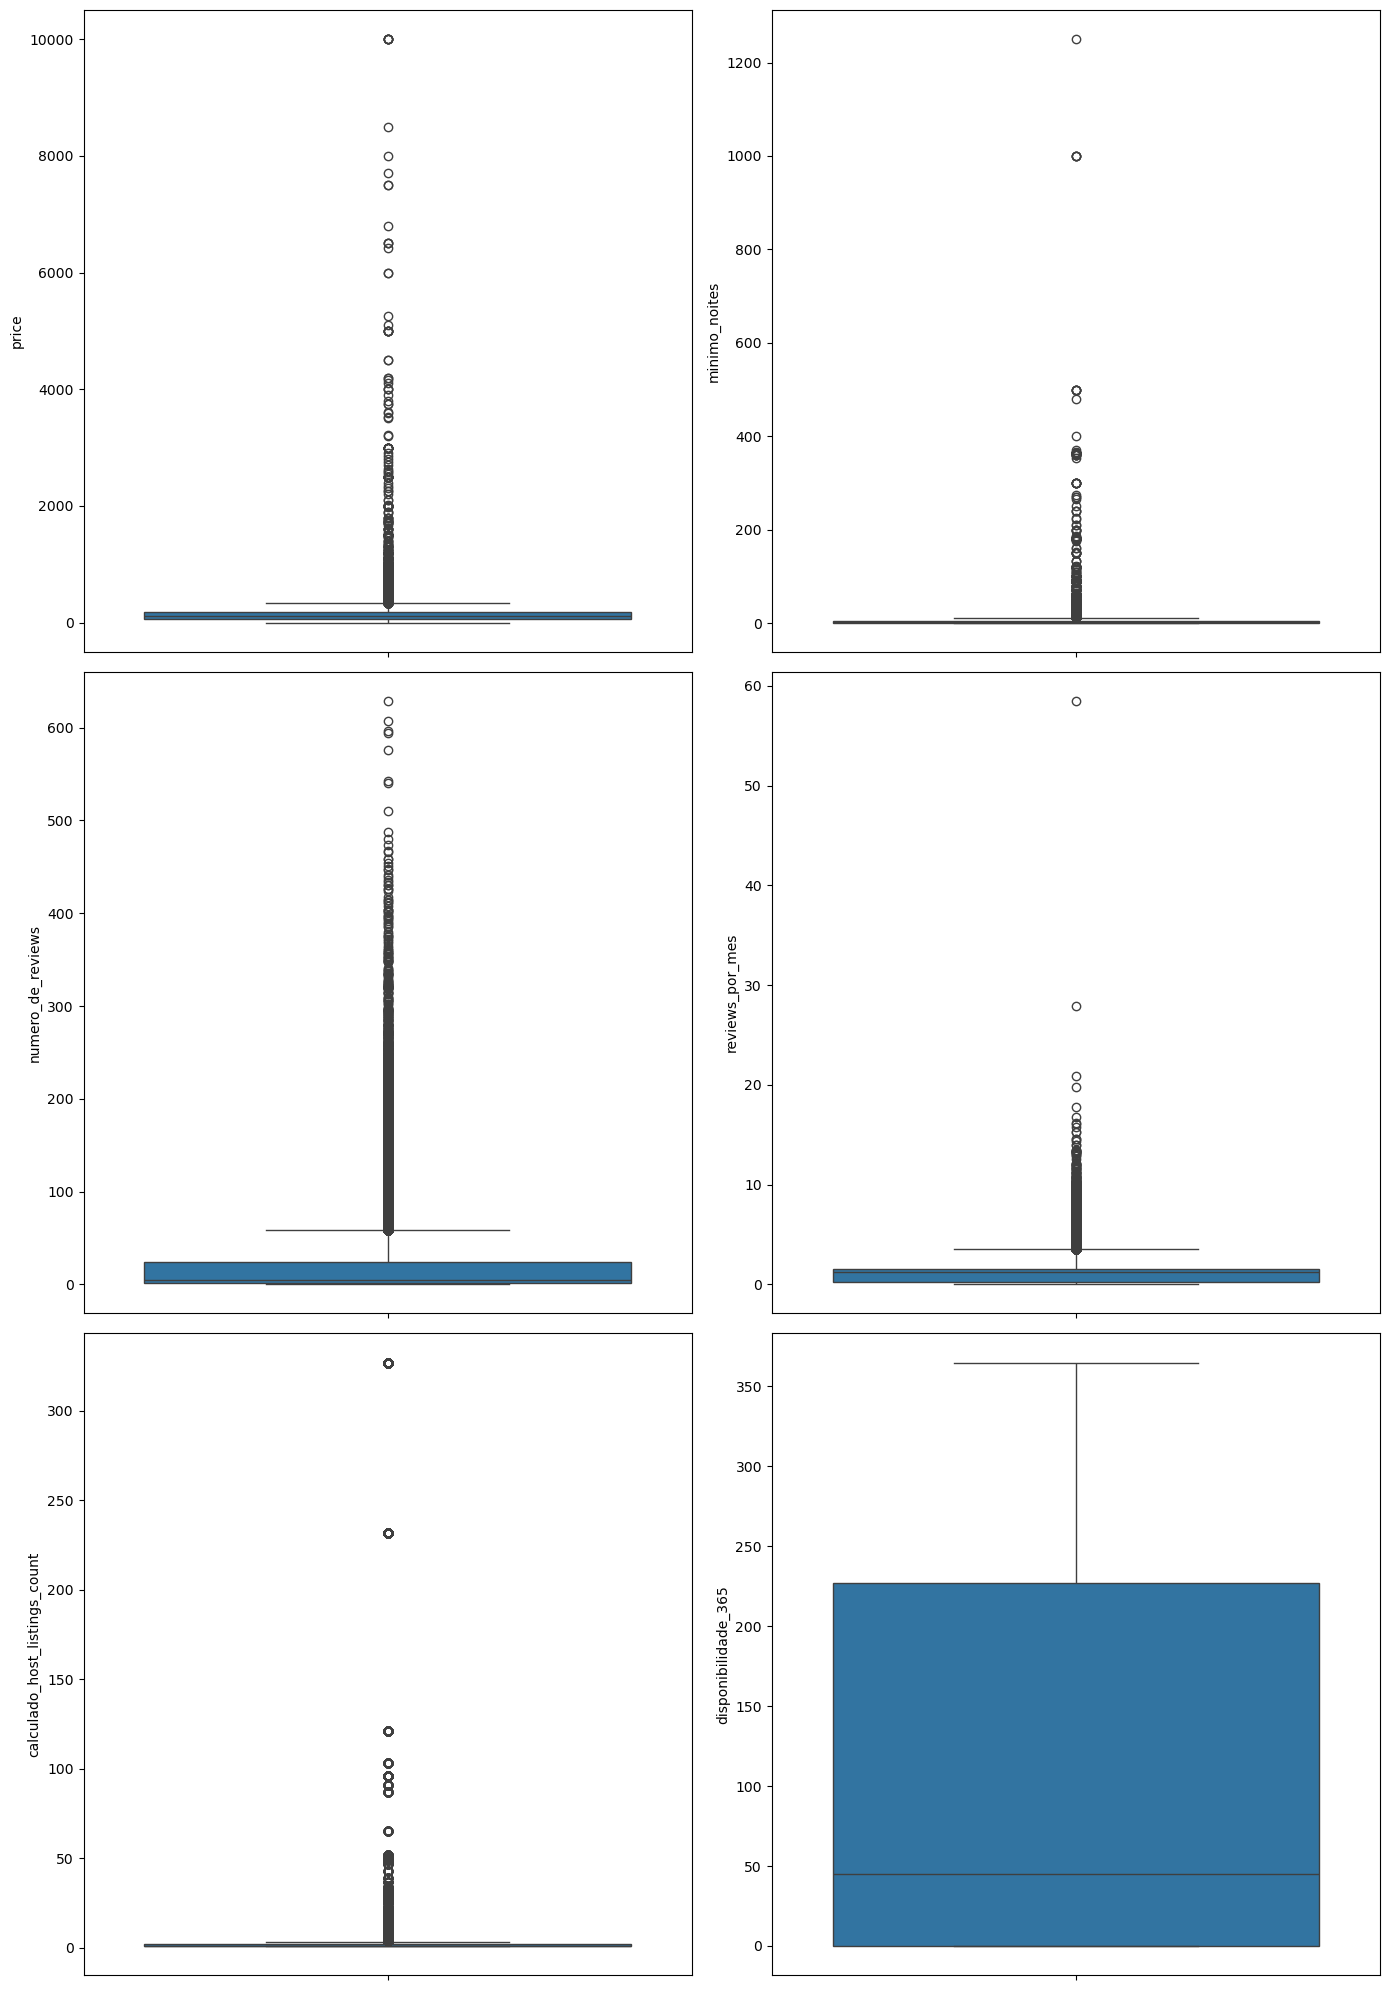

In [44]:
#Criação de gráficos em sequência para cada uma das variáveis
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True

#Visualização feita em forma de matriz linhas/colunas
f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0
for i in Var_Num_relevantes:
    sns.boxplot(data = df, y=i,ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

##### Comentário:
Com base nos dados, podemos supor que é uma base extremamente assimétrica e heterogênea, sendo provavelmente necessário a realização de transformações estatísticas e remoção de valores. Fazendo uma correlação com outras variáveis, principalmente categóricas, talvez seria possível entender essa variedade tão grande.

### Análise de distribuição de dados
A análise da distribuição dos dados é essencial para entender o comportamento e a estrutura das variáveis em um conjunto de dados. Isso ajuda a identificar padrões, tendências e possíveis problemas antes de aplicar modelos estatísticos ou de machine learning.

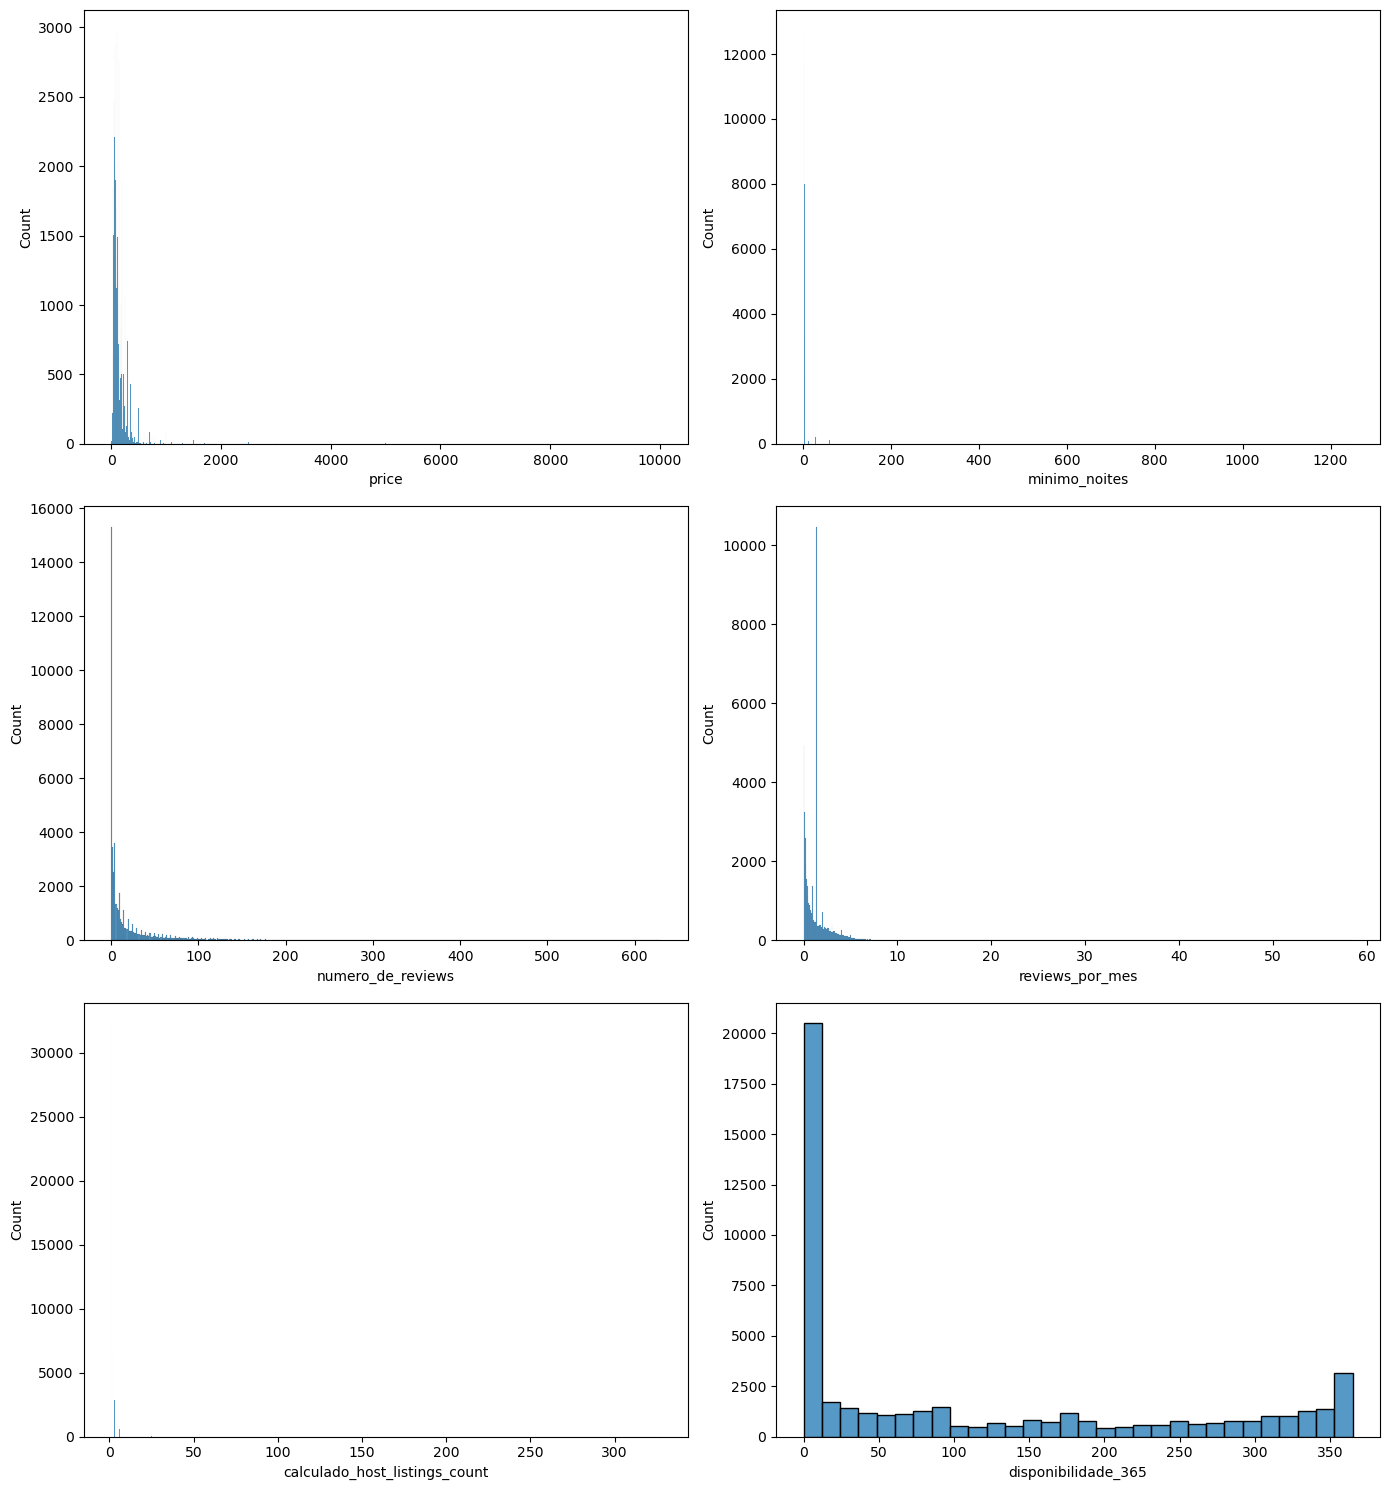

In [47]:
#Repetição da geração de graficos em forma de matriz
plt.rcParams["figure.figsize"] = [14.00, 15.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0
for i in Var_Num_relevantes:
    sns.histplot(data = df, x=i,ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

##### Comentário:
Com base nas vizualisações, podemos ver que os valores mais frequentes estão concentrados na parte alta da distribuição, enquanto a cauda da distribuição se estende para os valores mais baixos, ou seja, trata-se de uma distribuição negativa.

### Transformação dos dados
Devido a distorção dos dados, aplicaremos a trasformação logarítmica para ver se há uma melhor visualização dos dados tanto no Boxplots, quanto nos histogramas

In [50]:
#Transformação de log
df["price"] = np.log1p(df["price"])
df["minimo_noites"] = np.log1p(df["minimo_noites"])
df["numero_de_reviews"] = np.log1p(df["numero_de_reviews"])
df["reviews_por_mes"] = np.log1p(df["reviews_por_mes"])
df["calculado_host_listings_count"] = np.log1p(df["calculado_host_listings_count"])
df["disponibilidade_365"] = np.log1p(df["disponibilidade_365"])

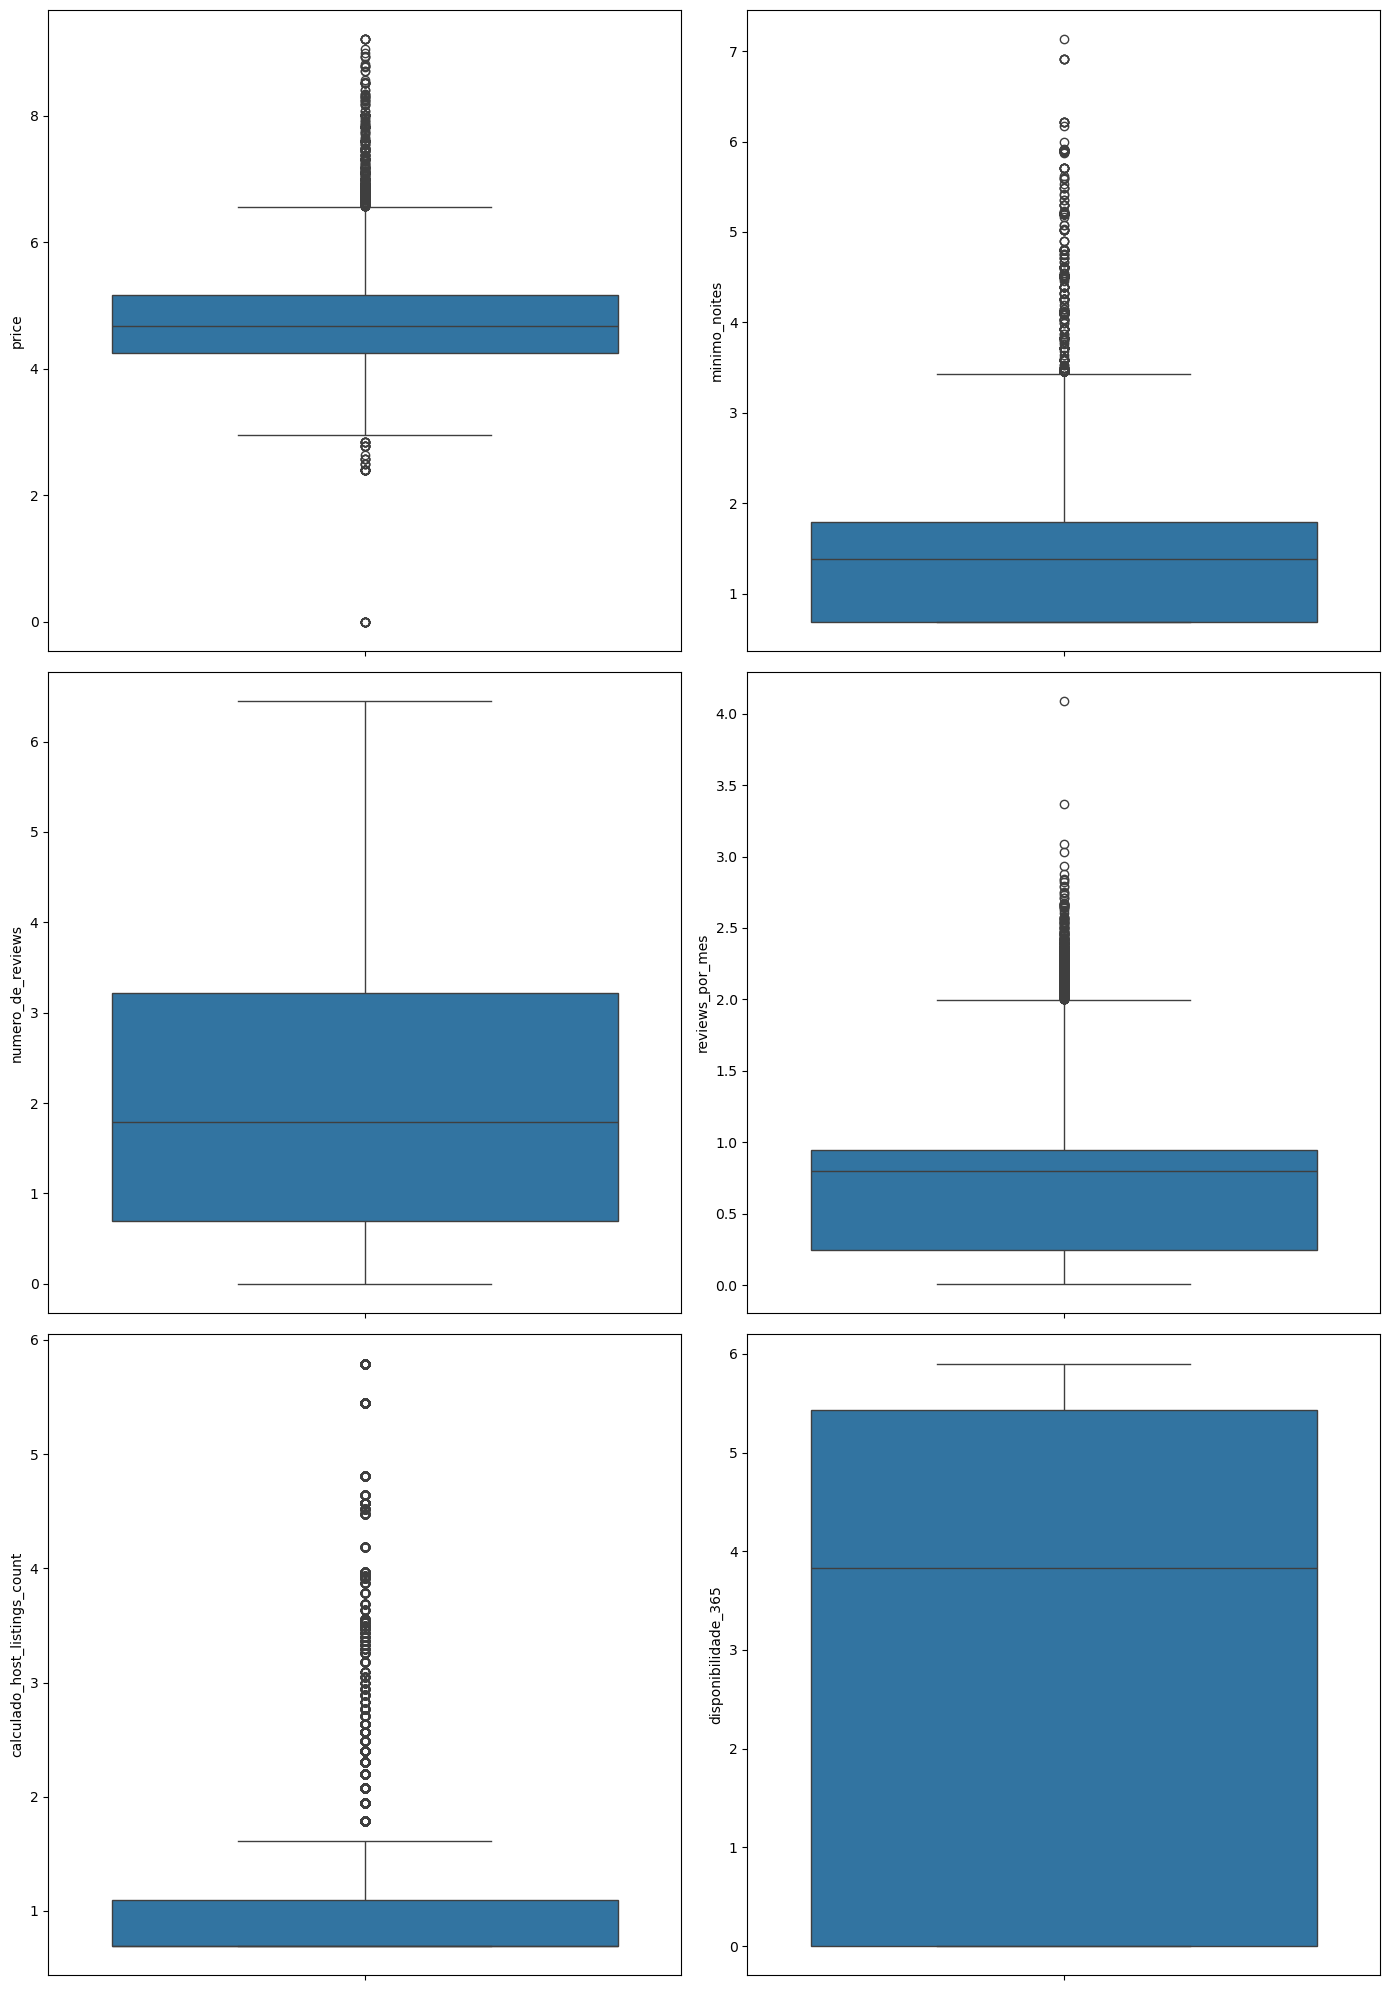

In [51]:
Var_Num_relevantes_Log = ["price", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365"]
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0
for i in Var_Num_relevantes_Log:
    sns.boxplot(data = df, y=i,ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

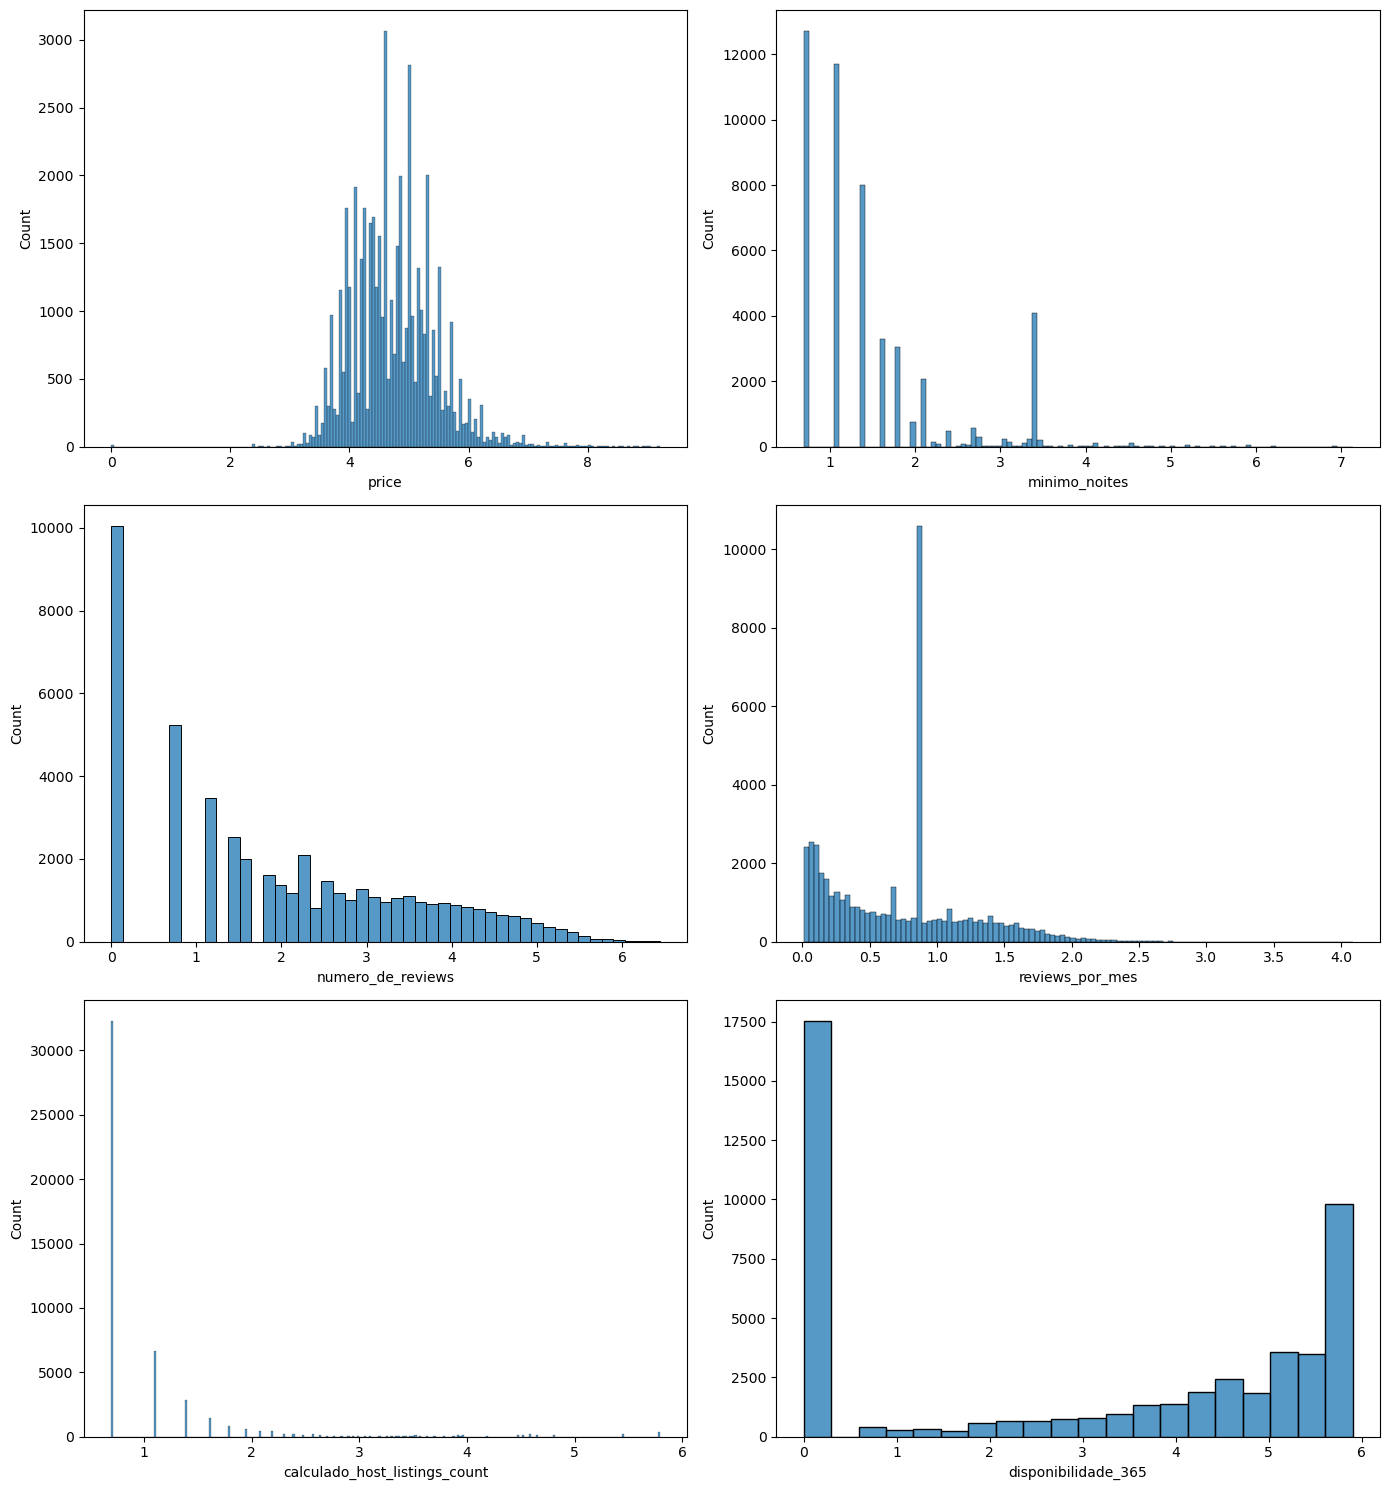

In [52]:
#Repetição da geração de graficos em forma de matriz
plt.rcParams["figure.figsize"] = [14.00, 15.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0
for i in Var_Num_relevantes_Log:
    sns.histplot(data = df, x=i,ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

##### Comentário:
Após a transformação, é perceptível que muitas variáveis numéricas tiveram uma mudança, principalmente a variavel alvo, na qual trouxe uma representação visual mais simétrica.

### Matriz de Correlações Continuas
Essa matriz mede a correlação entre todas as variáveis umas com as outras, sendo a pontuação "1" = correlação forte positiva e "-1" = correlação forte negativa. O sentido positivo simboliza que são variáveis diretamente proporcionais, já o sentido negativo indica que são variáveis inversamente proporcionais.

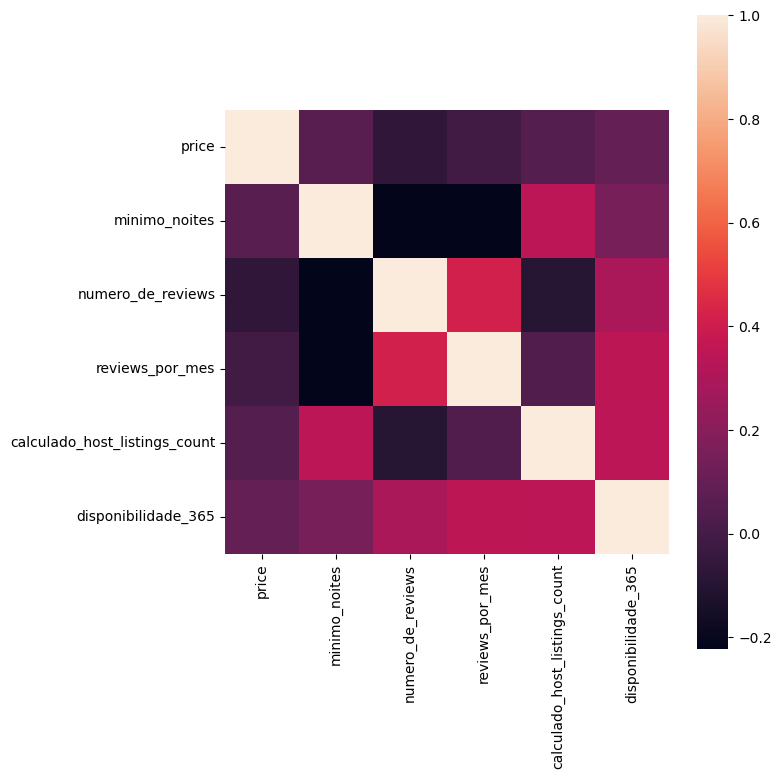

In [55]:
#Contrução da Matriz
plt.figure(figsize=(8,8))
sns.heatmap(df[["price",
                "minimo_noites",
                "numero_de_reviews",
                "reviews_por_mes",
                "calculado_host_listings_count",
                "disponibilidade_365"]].corr(), vmax = 1., square = True)
plt.show()

##### Comentário:
Com base na matriz, podemos obsrvar que a variável alvo "price", não possui correlação positiva com as outras variáveis, na verdade todas elas tendem a ser inversamente proporcionais a ela. Ou seja, quanto maior for o valor das variáveis independentes, a possibilidade da variável preço ser menor aumenta.

# Teste de modelos preditivos de regressão


Inicialmente, será feito alguns modelos de previsão, para que posteriormente seja feita a comparação entre os resultados

### Escolha de variáveis e divisão de dados
Para fazer os modelos será necessário transformar variáveis categóricas para ser possível o treinamento dos dados.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [121]:
le_bairro_group = LabelEncoder()
le_bairro = LabelEncoder()
le_room_type = LabelEncoder()
# Codificando as colunas para serem utilizadas pelos classificadores
df['bairro_group'] = le_bairro_group.fit_transform(df['bairro_group'])
df['bairro'] = le_bairro.fit_transform(df['bairro'])
df['room_type'] = le_room_type.fit_transform(df['room_type'])
df.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,1,13,40.68,-73.95,1,4.26,1.10,0.00,NaN,0.86,1.10,2.30
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,1,28,40.70,-73.93,1,3.71,1.61,0.00,NaN,0.86,1.10,3.61
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,2,94,40.81,-73.95,0,4.75,2.40,0.00,NaN,0.86,0.69,3.33
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,2,95,40.76,-73.99,2,4.03,0.69,0.00,NaN,0.86,1.95,1.10
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,2,95,40.76,-73.99,1,4.51,2.08,0.00,NaN,0.86,0.69,3.18


In [62]:
# Selecionar features e target
features = ['bairro_group', 'bairro', 'room_type', 'latitude','longitude',
            'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 
            'calculado_host_listings_count', 'disponibilidade_365']
target = 'price'

In [63]:
# Aplicar transformação
X = df[features]
y = df[target]

In [64]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#### Modelo de regressão Linear Multipla

In [66]:
# Treinar o modelo
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [67]:
# Prever no conjunto de teste
y_pred = LR.predict(X_test)
#Verificar modelo
mse_LR = mean_squared_error(y_test, y_pred)
r2_LR = r2_score(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse_LR:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_LR:.2f}")

Erro Quadrático Médio (MSE): 0.25
Coeficiente de Determinação (R²): 0.48


#### Modelo de Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor


In [70]:
# Criando a classe
rf = RandomForestRegressor(n_estimators = 190, max_depth = 30, max_features = 'sqrt', random_state = 42)

# Ajustando o algoritmo a base de dados
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=190,
                      random_state=42)

In [71]:
# Prevendo os resultados
rf_pred = rf.predict(X_test)

In [72]:
# Calculando R²
r2_RF = r2_score(y_test, rf_pred)
# Calculando MAE
mae_RF = mean_absolute_error(y_test, rf_pred)
# Calculando MSE
mse_RF = mean_squared_error(y_test, rf_pred)
# Calculando RMSE
rmse_RF = np.sqrt(mse_RF)

print(f'Erro Quadrático Médio(MSE): {mse_RF:.2f}')
print(f'Erro Absoluto Médio(MAE): {mae_RF:.2f}')
print(f'Raiz do Erro Quadrático Médio(RMSE): {rmse_RF:.2f}')
print(f'Coeficiente de Determinação(R²): {r2_RF:.2f}')

Erro Quadrático Médio(MSE): 0.19
Erro Absoluto Médio(MAE): 0.30
Raiz do Erro Quadrático Médio(RMSE): 0.43
Coeficiente de Determinação(R²): 0.61


### Previsão de um novo dado aplicado ao banco

In [79]:
# Dados do novo apartamento relevantes para fazer a previsão
novo_apartamento = pd.DataFrame([{
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355}])

In [81]:
# Codificando as colunas para serem utilizadas pelos classificadores
novo_apartamento['bairro_group'] = le_bairro_group.fit_transform(novo_apartamento['bairro_group'])
novo_apartamento['bairro'] = le_bairro.fit_transform(novo_apartamento['bairro'])
novo_apartamento['room_type'] = le_room_type.fit_transform(novo_apartamento['room_type'])

In [134]:
preco_previsto_log = rf.predict(novo_apartamento)
preco_previsto = np.exp(preco_previsto_log)
print(f"Preço previsto com transformação logarítmica: ${preco_previsto_log[0]:.2f}")
print(f"Preço previsto real: ${preco_previsto[0]:.2f}")

Preço previsto com transformação logarítmica: $5.79
Preço previsto real: $326.90


##### Comentário:
Com base no banco, existem muitos preços diários nessa faixa ou até menores devido ao fato de ter sido feita uma transformação logarítmica em alguns valores continuos, inclusive o preço. Para saber o valor exato, foi necessário fazer a reversão do valor.

# Perguntas sobre a atividade
* Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

R: A resposta é relativa, pois pode existir várias variáveis externas que incentive uma pessoa a comprar o produto. Pelos gráficos mostrados, percebe-se que a região do "Bronx" possui o menor preço, porém não tem uma grande quantidade de avaliações. No outro extremo, a região de manhattan é a mais cara, mas possui mais avaliações. Ao considerar tais fatos, percebe-se que sem definições claras priorizadas pelo alugador não há como determinar o melhor imóvel.

* O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

R: De acordo com os testes nos modelos, essas variáveis aparentemente possuem uma influência na variável alvo, pois ao removê-las da base de treino das previsões teve sua acurácia reduzida e seu erro médio aumentado, provando que eram, por mais que pouco, relevantes para a criação do modelo.

* Existe algum padrão no texto do nome do local para lugares de mais alto valor?

R: Aparentemente não, pois o nome das variáveis de nome do local pouco não se repetem, todas no cadastro são únicas.

* Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

R: Com base na interpretação dos gráficos montados e nos modelos, algumas variáveis foram relevantes para a previsão do preço. Os indicadores numéricos como "minimo_noites", "numero_de_reviews", "reviews_por_mes" e "disponibilidade_365" poderiam ser úteis pois representam fatores que os clientes demandam para fazer sua escolha, e quanto maior a demanda, maior o preço a ser ofertado. Os valores qualitativos como "bairro", "bairro_group" e "room_type" foram utilizados, mas para isso precisaram ser codificados para forma numérica, para que também pudessem ser considerados nos treinos. Tendo em vista que se trata da previsão de preço, é correto afirmar que se trata de uma resolução de problema de regressão, devido ao fato de abordar variáveis que tem total influência em um valor contínuo que depende delas. Ao avaliar qual modelo usar, foi necessário ver suas finalidades e relacioná-los com o resultado dos gráficos na etapa de "Visualizações". No fim, o modelo "Random Forest" foi o escolhido pelo fato de apresentar melhores resultados.

* Supondo um apartamento com as seguintes características: {'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355} Qual seria a sua sugestão de preço?

R: Com base no modelo de Random forest, na qual foi o que teve a acurácia maior, o valor do aluguel do imóvel poderia ser de aproximadamente 325 dólares, caso fosse anunciado.